<a href="https://colab.research.google.com/github/emailic/YOLOv5-Microplasticos/blob/main/Microplasticos_1152_no_TL_Low_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Microplastics Detector 



By Ema Ilic <br> 
ema.ilic9@gmail.com<br> 
https://www.linkedin.com/in/ema-ilic/

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!conda install pytorch torchvision cudatoolkit=11.3 -c pytorch #install pytorch

/bin/bash: conda: command not found


Clone yolov5 repository from ultralytics:

In [4]:
!git clone https://github.com/ultralytics/yolov5  
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13126, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 13126 (delta 0), reused 3 (delta 0), pack-reused 13122
Receiving objects: 100% (13126/13126), 12.45 MiB | 28.72 MiB/s, done.
Resolving deltas: 100% (9016/9016), done.
/content/yolov5


Install requirements:

In [5]:
%pip install -qr requirements.txt  

     |████████████████████████████████| 596 kB 4.6 MB/s 


Import libraries:

In [6]:
%cd yolov5
import torch
from yolov5 import utils
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


%matplotlib inline
display = utils.notebook_init()

YOLOv5 🚀 v6.1-320-gb367860 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.9/78.2 GB disk)



Place data into correct folders and write 'data.yaml' file that suits your data: Make sure the paths to the data are correct. 
Make sure that the number of classes (nc) and the names of the classes match your data.
    

This is the content of my .yaml file for this project:

In [7]:
!cat '/content/drive/My Drive/microplasticos/microplasticos_1152.yaml'
print ('---------------------------------------------')

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# COCO128 dataset https://www.kaggle.com/ultralytics/coco128 (first 128 images from COCO train2017) by Ultralytics
# Example usage: python train.py --data coco128.yaml
# parent
# ├── yolov5
# └── datasets
#     └── coco128  ← downloads here (7 MB)


# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/drive/My Drive/microplasticos/images  # dataset root dir
train: train_1152 # train images (relative to 'path') 128 images
val: val_1152 # val images (relative to 'path') 128 images
test: test_1152  # test images (optional)

# Classes
nc: 5  # number of classes
names: ['fragment', 'line', 'organic', 'pellet', 'tar']  # class names


# Download script/URL (optional)
download:---------------------------------------------


## Training

In [ ]:
torch.cuda.empty_cache()
#torch.cuda.memory_stats(device=None)

!python train.py  --batch 8 --epochs 150 --data '/content/drive/My Drive/microplasticos/microplasticos_1152.yaml' --weights yolov5s6.pt --project '/content/drive/My Drive/microplasticos/microplasticos_1152'  --imgsz=1152 --name 'feature_extraction'  --cache ram
#torch.cuda.memory_stats(device=None)

train: weights=yolov5s6.pt, cfg=, data=/content/drive/My Drive/microplasticos/microplasticos_1152.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=8, imgsz=1152, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/My Drive/microplasticos/microplasticos_1152, name=feature_extraction, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-320-gb367860 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, 

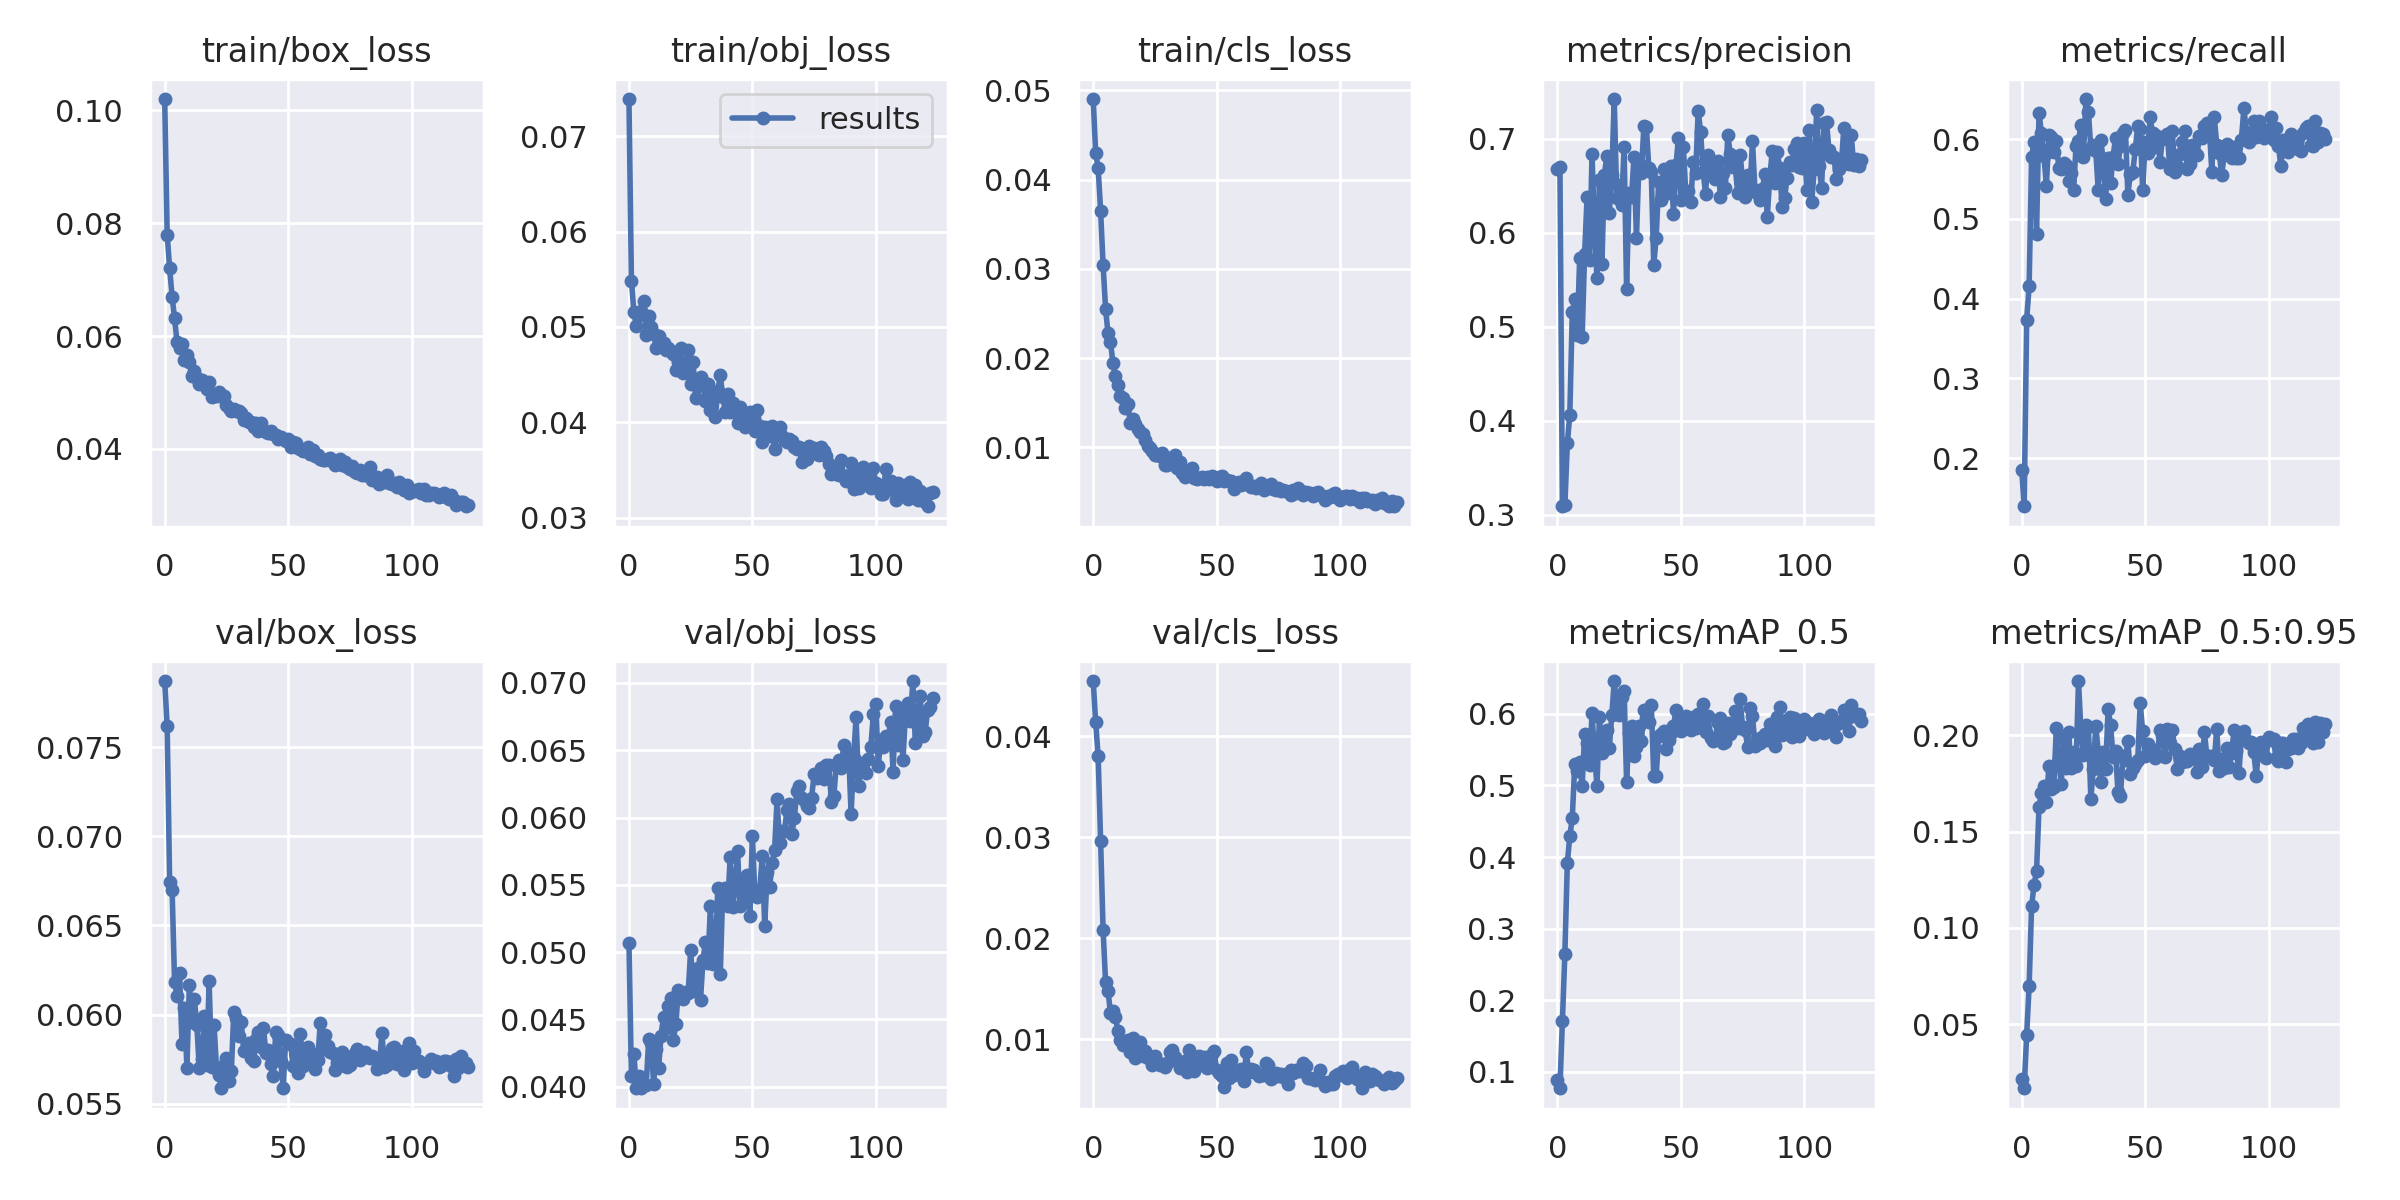

In [ ]:
display.Image(f"/content/drive/My Drive/microplasticos/microplasticos_1152/feature_extraction11/results.png")

##Validation on TEST data (only to be done w the final setting)

In [ ]:
!python val.py --weights '/content/drive/My Drive/microplasticos/microplasticos_1152/feature_extraction11/weights/best.pt' --batch 10 --imgsz=1152 --data '/content/drive/My Drive/microplasticos/microplasticos_1152.yaml' --task test --project '/content/drive/My Drive/microplasticos/microplasticos_1152' --name 'validation_on_test_data' --augment


val: data=/content/drive/My Drive/microplasticos/microplasticos_1152.yaml, weights=['/content/drive/My Drive/microplasticos/microplasticos_1152/feature_extraction11/weights/best.pt'], batch_size=10, imgsz=1152, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=/content/drive/My Drive/microplasticos/microplasticos_1152, name=validation_on_test_data, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 280 layers, 12323608 parameters, 0 gradients, 16.2 GFLOPs
100% 755k/755k [00:00<00:00, 23.7MB/s]
test: Scanning '/content/drive/My Drive/microplasticos/labels/test_1152' images and labels...140 found, 0 missing, 13 empty, 0 corrupt: 100% 140/140 [00:40<00:00,  3.45it/s]
test: New cache created: /content/drive/My Drive/microplasticos/labels/test_1152

Plot Precision Recall curve:

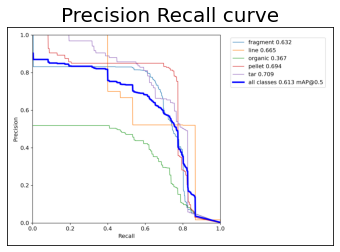

In [ ]:
plt.plot(figsize=(50,50))
plt.title('Precision Recall curve', fontsize=20)
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.imshow(mpimg.imread('/content/drive/My Drive/microplasticos/microplasticos_1152/validation_on_test_data2/PR_curve.png'))


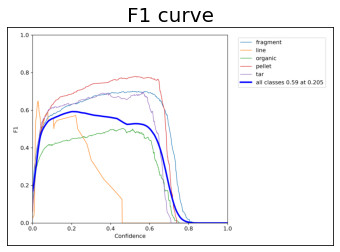

In [ ]:
plt.plot(figsize=(50,50))
plt.title('F1 curve', fontsize=20)
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.imshow(mpimg.imread('/content/drive/My Drive/microplasticos/microplasticos_1152/validation_on_test_data2/F1_curve.png'))

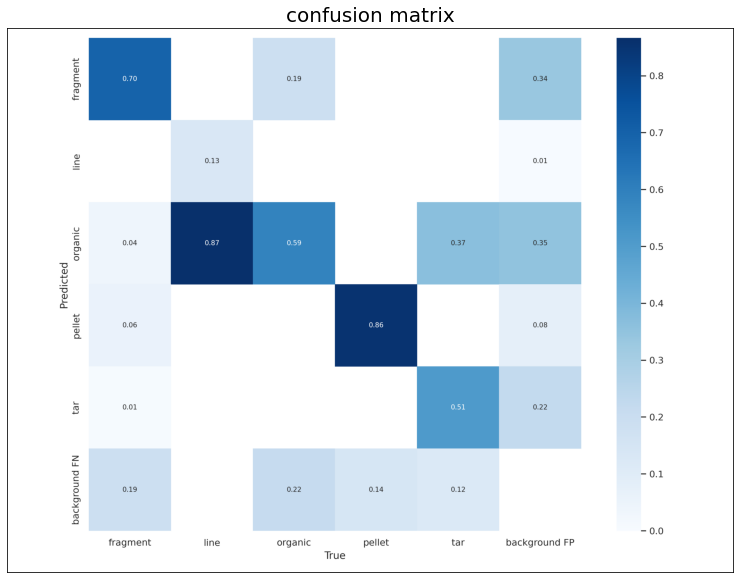

In [ ]:
plt.rcParams["figure.figsize"] = (13,13)
plt.plot()
plt.title('confusion matrix', fontsize=20)
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.imshow(mpimg.imread('/content/drive/My Drive/microplasticos/microplasticos_1152/validation_on_test_data2/confusion_matrix.png'))

## <font color=2892A8>Inference</font>

In [ ]:
!python detect.py --weights '/content/drive/My Drive/microplasticos/microplasticos_1152/feature_extraction11/weights/best.pt'  --data '/content/drive/My Drive/microplasticos/microplasticos_1152.yaml' --conf 0.5 --source '/content/drive/My Drive/microplasticos/images/test_1152' --project '/content/drive/My Drive/microplasticos/microplasticos_1152' --name 'detect_test' --imgsz=1152 #--augment --line=3 --visualize=True --view_img=True


detect: weights=['/content/drive/My Drive/microplasticos/microplasticos_1152/feature_extraction11/weights/best.pt'], source=/content/drive/My Drive/microplasticos/images/test_1152, data=/content/drive/My Drive/microplasticos/microplasticos_1152.yaml, imgsz=[1152, 1152], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/drive/My Drive/microplasticos/microplasticos_1152, name=detect_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.7.13 torch-1.11.0+cu102 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 280 layers, 12323608 parameters, 0 gradients, 16.2 GFLOPs
image 1/140 /content/drive/My Drive/microplasticos/images/test_1152/20220516_113208.jpg_grid_0_0.jpg: 1152x1152 4 fragments, Done. (0.039s)
image 2/140 /con

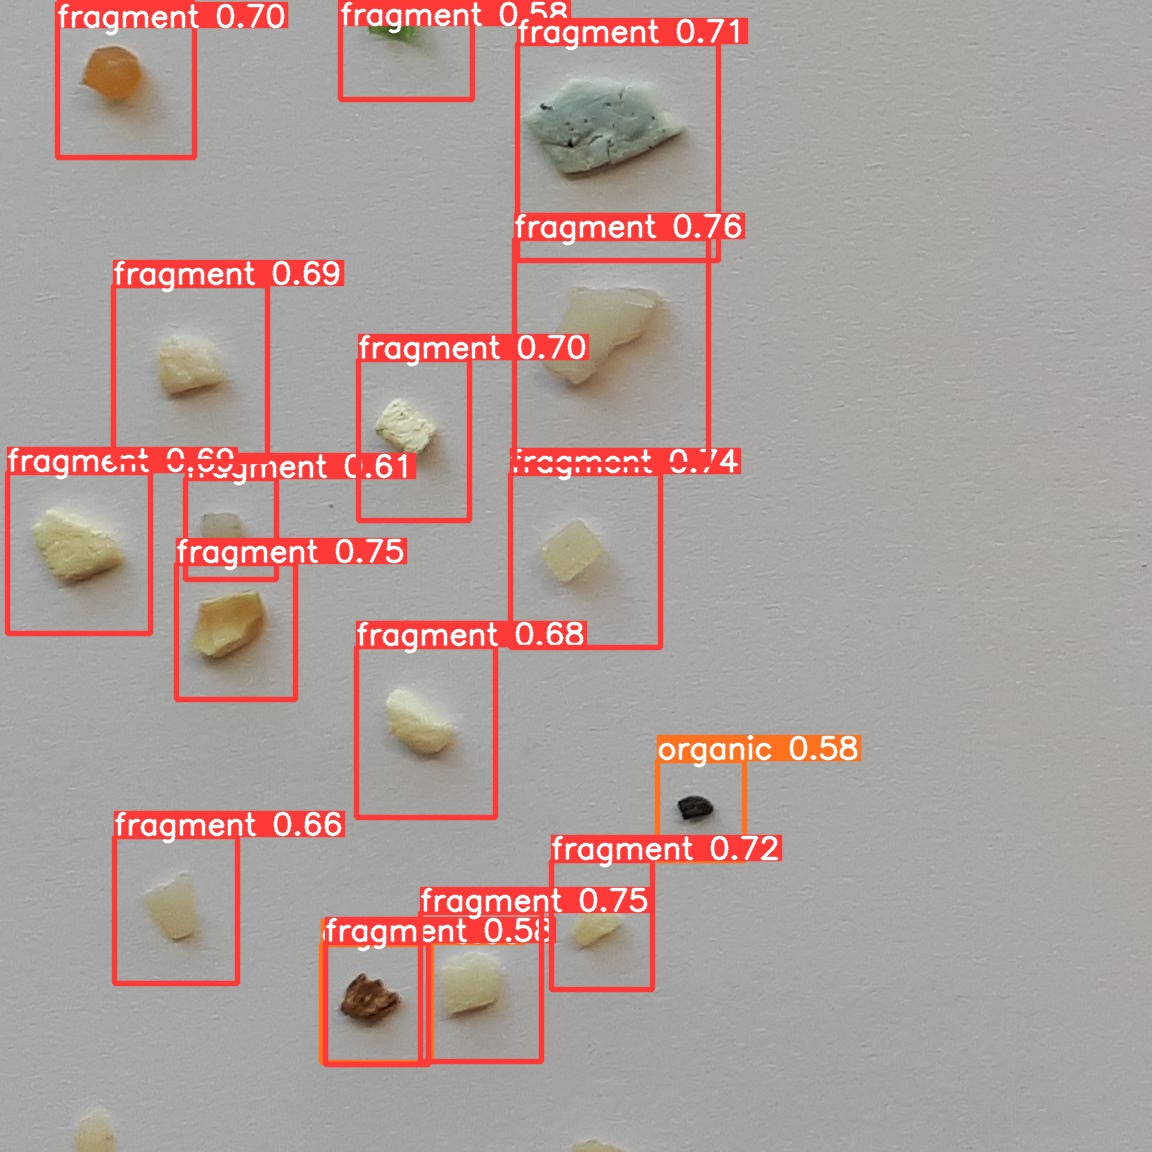

In [ ]:
display.Image(filename='/content/drive/My Drive/microplasticos/microplasticos_1152/detect_test5/20220516_113718.jpg_grid_1536_384.jpg', width=1152)